Author: Zehao Li
    
UNI: zl3667
    
Date: 12/14/2025
    
Course: EECS E4040 - Deep Learning & Neural Networks

Note: We wrote this code ourselves, except where we have clearly mentioned references or collaborations.

References :
A. Trockman and J. Z. Kolter, “Patches are all you need?,” arXiv preprint, arXiv:2201.09792, 2022.

# Data Check

This notebook verifies that our data loading pipeline works correctly.

In [1]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

PyTorch version: 1.10.1+cu102
CUDA available: True


## Load CIFAR-10 Dataset

In [3]:
# Basic transforms for now
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Download and load training data
trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True,
    download=True, 
    transform=transform
)

testset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=False,
    download=True, 
    transform=transform
)

print(f"Training samples: {len(trainset)}")
print(f"Test samples: {len(testset)}")

0.0%

78.1%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

87.9%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

94.7%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

96.4%

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Training samples: 50000
Test samples: 10000


In [4]:
# Class names
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

# Check a single sample
image, label = trainset[0]
print(f"Image shape: {image.shape}")
print(f"Label: {label} ({classes[label]})")

Image shape: torch.Size([3, 32, 32])
Label: 6 (frog)


## Visualize Sample Images

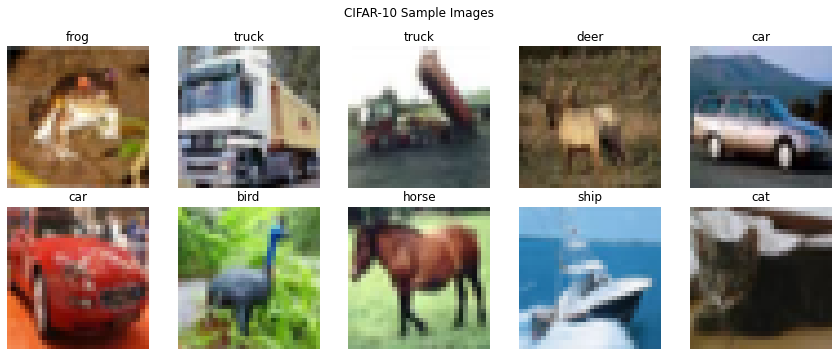

In [5]:
def imshow(img):
    """Display a tensor image."""
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Display 10 sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    image, label = trainset[i]
    ax.imshow(np.transpose(image.numpy() / 2 + 0.5, (1, 2, 0)))
    ax.set_title(classes[label])
    ax.axis('off')

plt.suptitle('CIFAR-10 Sample Images')
plt.tight_layout()
# plt.savefig('../figures/cifar10_samples.png', dpi=150)
plt.show()

## Create DataLoaders

In [6]:
batch_size = 64

trainloader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=batch_size,
    shuffle=True, 
    num_workers=2
)

testloader = torch.utils.data.DataLoader(
    testset, 
    batch_size=batch_size,
    shuffle=False, 
    num_workers=2
)

# Test one batch
images, labels = next(iter(trainloader))
print(f"Batch shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

Batch shape: torch.Size([64, 3, 32, 32])
Labels shape: torch.Size([64])


## Summary

- CIFAR-10 loaded successfully
- 50,000 training images, 10,000 test images
- Image size: 32x32x3
- 10 classes